In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'consumer_attention_bound'
varied_param_legend_label = 'Attention Bound'
varied_param_x_label = 'Consumer Attention Bound'

In [4]:
num_influencers = 1
num_agents = 8

attention_bounds = list(np.linspace(1, 100, 10))

varied_param_values = attention_bounds

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=attention_bounds,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing influencer 8
Optimizing producer 0
Optimization succeeded using 3 iterations and 8 function evaluations.
Optimizing producer 1
Optimization succeeded using 2 iterations and 6 function evaluations.
Optimizing producer 2
Optimization succeeded using 3 iterations and 8 function evaluations.
Optimizing producer 3
Optimization succeeded using 3 iterations and 8 function evaluations.
Optimizing producer 4
Optimization succeeded using 2 iterations and 6 function evaluations.
Optimizing producer 5
Optimization succeeded using 2 iterations and 6 function evaluations.
Optimizing producer 6
Optimization succeeded using 2 iterations and 6 function evaluations.
Optimizing producer 7
Optimization succeeded using 3 iterations and 8 function evaluations.
Iteration 0 / 100 done in 0.11988495900004636 seconds.
Total Soc

In [6]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

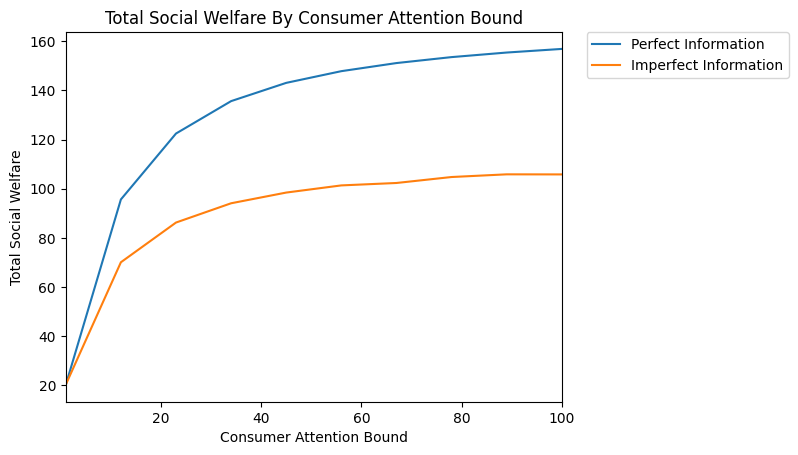

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

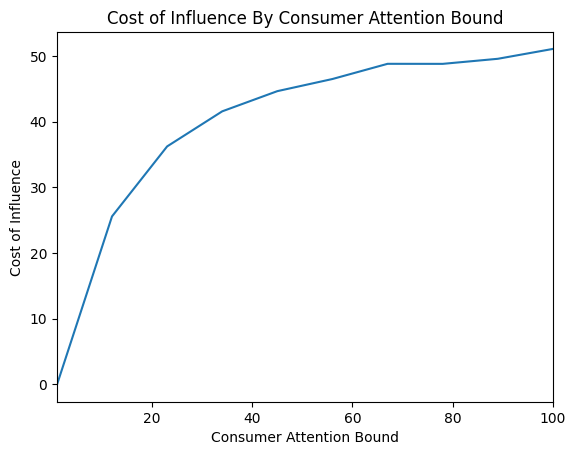

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

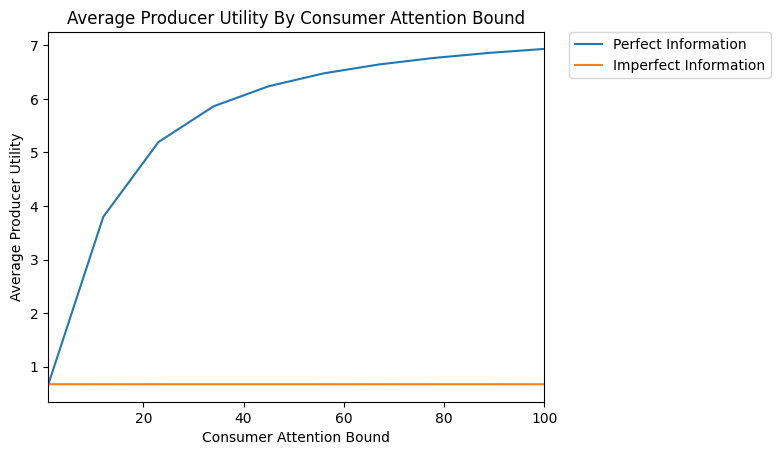

In [12]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

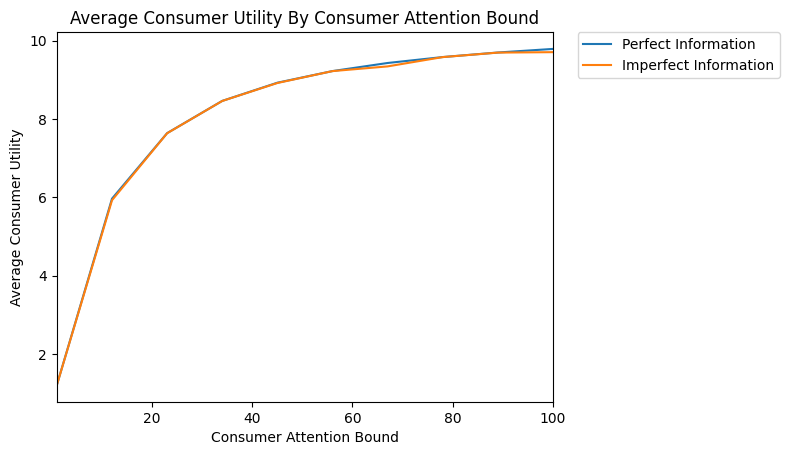

In [13]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

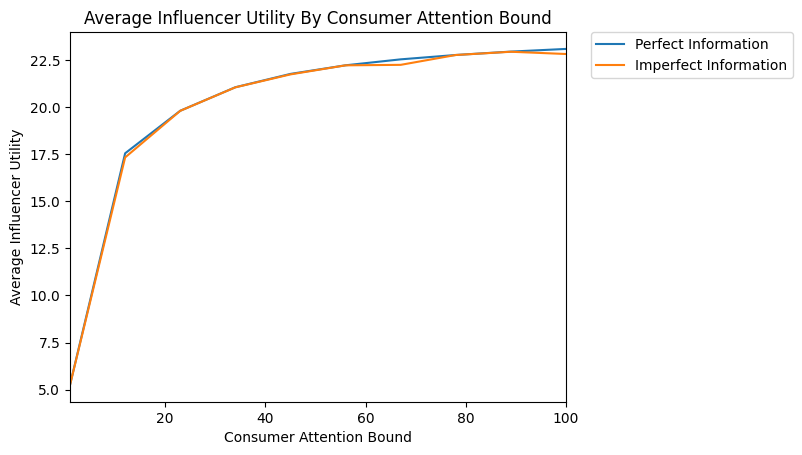

In [14]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

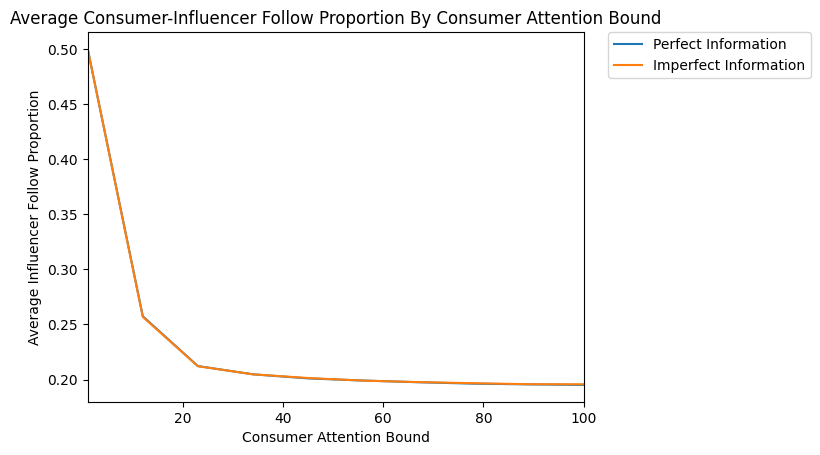

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

In [ ]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

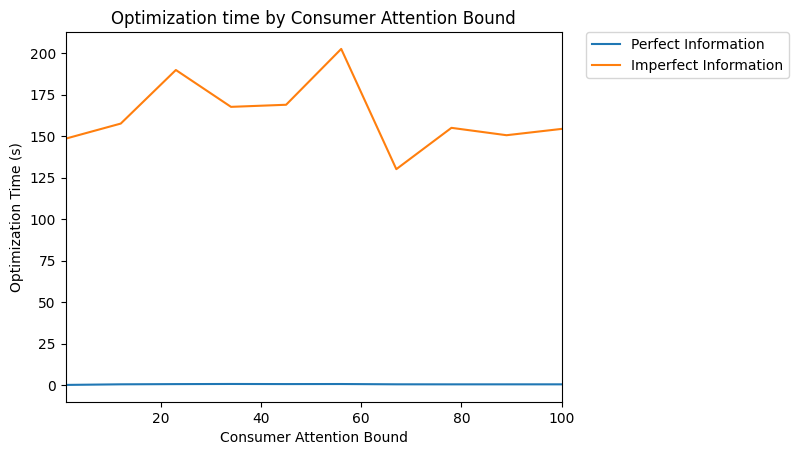

In [16]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

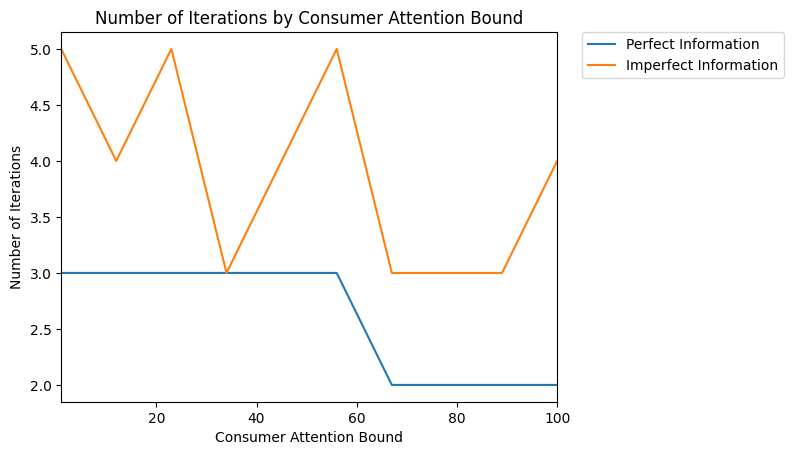

In [17]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

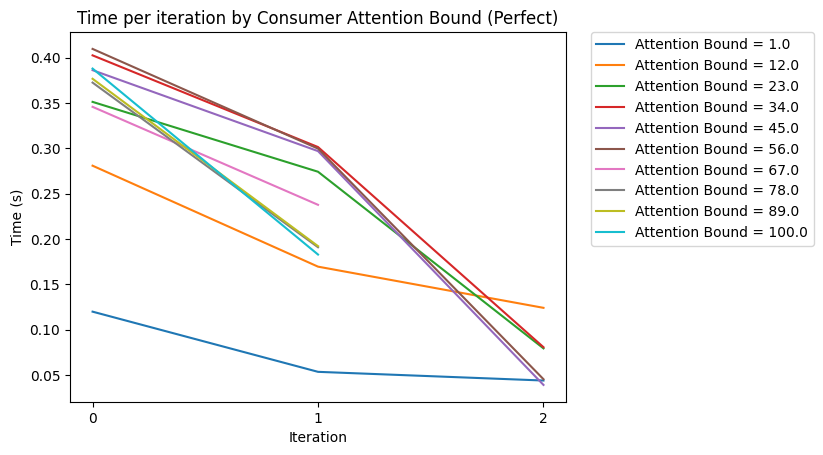

In [18]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

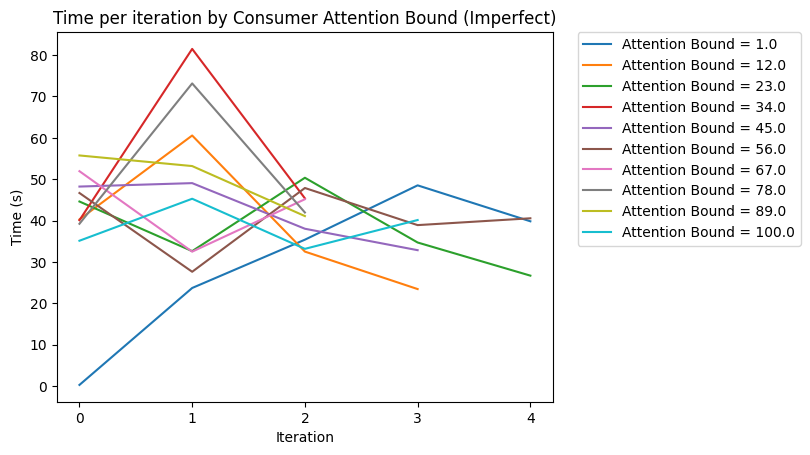

In [19]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

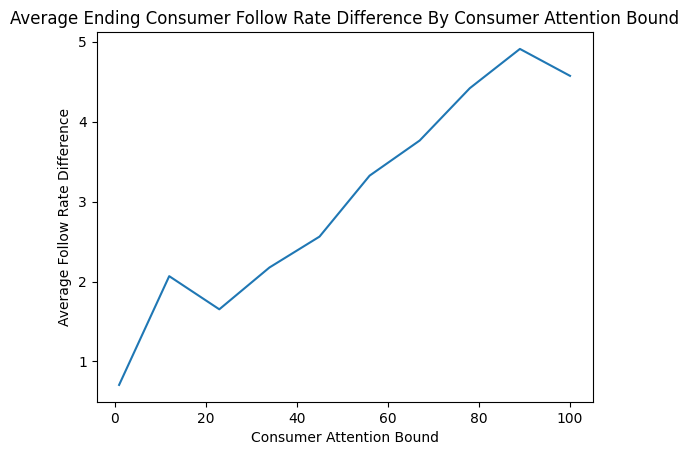

In [20]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

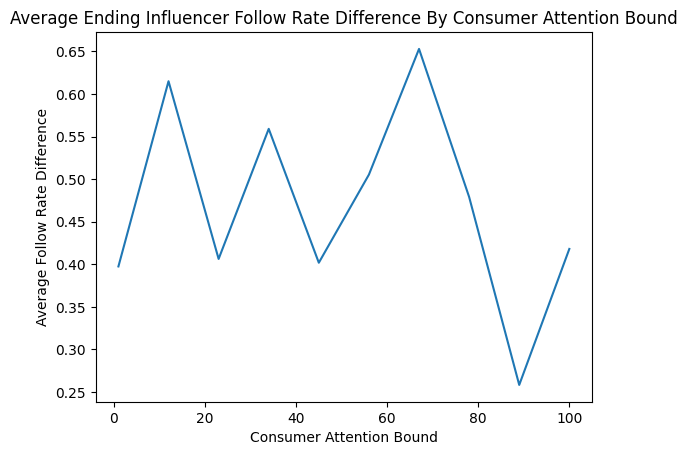

In [23]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

In [21]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 9.61506772494848, 9.66844956405722, 9.668489483700798], 'total_producer_utility': [0, 5.2005144300338975, 5.253896269142638, 5.253936188786217], 'total_influencer_utility': [0, 5.200514430033898, 5.253896269142638, 5.2539361887862155], 'total_social_welfare': [0, 20.016096585016275, 20.176242102342496, 20.176361861273232], 'average_consumer_rate_change': [0, 0.9428090416176839, 0.0, 0.0], 'average_producer_topic_change': [0, 0.1781085552188288, 0.07780233919859725, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.35766345115774756, 0.03390362695334591], 'average_consumer_utility_change': [0, 1.20188346561856, 0.006672729888592466, 4.989955447454175e-06], 'average_producer_utility_change': [0, 0.6500643037542373, 0.006672729888592466, 4.98995544742642e-06], 'average_influencer_utility_change': [0, 5.200514430033898, 0.053381839108739726, 3.9919643577412955e-05], 'consumer_stats': {0: {'utilities': [0, 1.10363832344823, 1.103638323448

In [22]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 5, 'total_consumer_utility': [0, 9.168462034209522, 9.278214112775352, 9.53476746111459, 9.662001019134928, 9.662872292867748], 'total_producer_utility': [0, 5.355423395620137, 5.354465286646976, 5.360043405907631, 5.358719725957867, 5.358719725957867], 'total_influencer_utility': [0, 4.7539087410791785, 4.863660819645007, 5.120214167984246, 5.247447726004584, 5.2483189997374025], 'total_social_welfare': [0, 19.277794170908837, 19.496340219067335, 20.015025035006467, 20.26816847109738, 20.26991101856302], 'average_consumer_rate_change': [0, 0.9428090414195736, 0.0, 0.0, 0.0, 0.0], 'average_producer_topic_change': [0, 0.0, 0.11495902362860998, 0.11450944077423932, 0.0825255228758433, 0.001073544202896605], 'average_influencer_rate_change': [0, 0.0, 0.4539101713325978, 0.13961731897279728, 0.32410797589405477, 0.13203542054281048], 'average_consumer_utility_change': [0, 1.1460577542761903, 0.013719009820728628, 0.03206916854240491, 0.01590419475254229, 0.00010890921660